# Manipulating data in CSV files

## Learning Outcomes

By the end of this notebook you should:

- Be familiar with CSV files.
- Be able to load them with the `csv` package.
- Be familiar with the `pandas` package.
- Be able to perform simple manipulation of pandas DataFrames.
- Be able to make intermediate level plots (including adding error bars).

We now have *almost* all the moving parts to start analysing data in Python. The only missing ingredient is a method to load real data without typing it all out into lists! There's a myriad of different data formats we can inteface with Python, some of which we will cover later in the course (of course). 

In this notebook we'll utilise CSV files. These are Comma Separated Values files. Essentially tables of values with each row on a new line and each value split by a ",". CSV files are a standard format widely used for small datasets due to their simplicity. You will be familiar with spreadsheets in Excel, Excel can both read CSV files and write spreadsheets to them. In fact, at their root, spreadsheets really are just CSV files. Here is a really simple example of a CSV file just so you can see the structure.

```
Student No., Mark, Group
0, 70, 1
1, 65, 1
2, 80, 2
3, 60, 2
```

As you can see, they quickly become difficult to parse by eye. Below we'll learn how to load these files, make them more readable, and manipulate the data within them to make plots and get results. In future PIP Lab sessions you'll be able to take your data in Excel and then save it to a CSV for analysis in Python.

Before you continue, you will need to download the `PythonExampleCSVfile1.csv`` file in order to complete the exercises below. The file can be found on Canvas in "The Python Notebooks" and in the GitHub repo, if you cloned it you already have the files in the "data" directory.


## Loading CSV files

Navigate to the CSV file you downloaded (or the one in repo) and double click it. This will open the file in your spreadsheet software (probably Excel but could be Numbers on Mac). You can now see the sort of information it contains. This file was generated by a PhD student, and contains real Astronomy research data - however, for these exercises, the meaning of the data is less important than the methods for accessing and manipulating it.

### Specifying Directories

Just a quick aside on directory paths before we start using them:

As an example, when on university computers, the file path to a file in the Downloads, Desktop, or Documents directories are, respectively:

```
C://Users/<insert username>/Downloads/<insert filename>
C://Users/<insert username>/Desktop/<insert filename>
C://Users/<insert username>/Documents/<insert filename>
```

These are the "address" the file. You can point to anywhere on your computer from anywhere by defining "absolute" paths like this. An absolute path contains the full address of a file from the root directory (here `Users`). There are also relative paths. These are paths that start from where you currently are. For instance the relative path of `file2.txt` in `Documents` from `Downloads` would be `../Documents/file2.txt`, where the `../` moves "up a directory". Look at the paths above to understand this, both `Documents` and `Downloads` are in the same parent directory so we first need to move "up from `Downloads` and then into `Documents`.

This will be similar on your personal computers but not exactly the same. Have a look at the filepath displayed for the file, and then copy this into the path variable as shown above.


### The csv package

Python has a built in module for accessing the data in CSV files. We will cover this here but in the future you'll likely use the more robust `pandas` module we'll cover shortly. To import the `csv`` module we'll use the techniques covered in [the packages notebook](6_packages.ipynb).

Just to drive it home: Remember that you should always load your modules at the start of your code (i.e  in the first Jupyter cell) and only load a given module once. In these notebooks I'll break a lot of rules for the sake of demonstration. 

Below I will use the "data" directory in the repo in all examples since that is where I have stored the data. **You will need to modify these paths to point to where you have the data stored.** I will use `../` to move "up a directory" as described above, since the data directory is in the same parent directory as the "Notebooks" directory. 


In [1]:
import csv

with open('../data/PythonExampleCSVfile1.csv', 'r') as myfile:

    # Assign the data in the file to a variable
    mydata = csv.reader(myfile)
    
    # Loop over rows in the dataset
    for myrow in mydata:
        print (myrow)


['Name', 'Redshift', 'Mean_X', 'Mean_x_minus_delta', 'Mean_x_plus_delta', 'Mean_y', 'Mean_y_minus_delta', 'Mean_y_plus_delta']
['XMMXCS J113313.8+662243.9', '0.12', '5.031', '4.805', '5.255', '11.087', '10.239', '11.883']
['XMMXCS J215336.9+174146.4', '0.25', '10.599', '10.301', '10.897', '10.363', '10.066', '10.66']
['XMMXCS J164020.3+464226.2', '0.23', '10.589', '10.134', '11.045', '10.22', '9.875', '10.563']
['XMMXCS J172226.8+320754.3', '0.23', '8.548', '7.972', '9.125', '9.069', '8.49', '9.695']
['XMMXCS J003706.3+090924.6', '0.27', '9.089', '8.794', '9.387', '8.693', '8.401', '8.987']
['XMMXCS J022154.8-054519.0', '0.26', '8.675', '5.2', '17.719', '8.684', '5.2', '17.718']
['XMMXCS J233757.0+271121.0', '0.12', '3.588', '3.2', '4.025', '8.671', '8.507', '8.835']
['XMMXCS J021837.8-054037.0', '0.27', '1.244', '1.025', '1.389', '8.536', '6.916', '10.685']
['XMMXCS J014430.3+021237.0', '0.17', '3.023', '2.279', '4.152', '8.331', '7.272', '9.165']
['XMMXCS J131129.9-012024.4', '0.18',


If you didn't get the directory right in the cell above you will have seen a new type of Error like below (with <path_to_file> replaced with the path you tried).
```
IOError: [Errno 2] No such file or directory: <path_to_file>
```

There are quite a few moving parts in the above code, so lets go through it step by step.

- The `with` statement is similar to an `if` statement or `for` loop, in that you need to indent blocks of code underneath it to tell Python what should be done with the `with`. Think of the `with` statement as meaning *'with this item do the following`*, where the "item" above is the CSV file stored in the `myfile` variable and the "following" is the code block indented underneath. Normally the item is a file like we have here, because we want to make sure we close a file when we are done with it. A `with` does this automatically so we don't need to worry about it.

\item The `open` command, unsurpirsingly, opens a file (this works for any file not just CSVs). `open` takes a string argument for the file path (but note that you could use a variable that has been set to the filename). The `"r"` that comes after the filename defines the *mode* of the file. In this case the `"r"` mode tells Python to read the file. If we had chosen `"w"` that would tell Python to "write" to the file, but don't do that... it'll overwrite the data in the file!

- The `as myfile` assigns the opened file returned by `open` to the variable `myfile`.

- The next line in the code block uses the `csv.reader` function to read the data from the file and stores it in the variable `mydata``. 

- Then a `for` loop is used to loop over each row of the CSV file, assigning each row to the `myrow` variable and printing the row with `print(myrow)`. Just to be absolutely clear (and drive home an earlier point from [the variables section of notebook 1](1_the_basics.ipynb): The variable names `myfile`, `mydata``, and `myrow`) are irrelevant, they are just names, e.g. even if you changed the code to say `mycolumn`, the data would still be read in as rows. 

- After the `for` loop is finished, the with block has been completed. You now cannot try to read in the `mydata` variable, as file has been closed when the `with` block was exited. Feel free to modify the cell above to check this. The only way you can develop an intuition for errors and what they mean about your code is by seeing them first hand and finding the cause and solution. 

To be able to use all the data within the CSV file, we have to assign the data to lists. The contents of the file ("PythonExampleCSVfile1.csv") is summarised in the table below.

| Column      | Description                   |
|-------------|-------------------------------|
| Column A:   | Name                          |
| Column B:   | Redshift                      |
| Column C:   | Mean-$x$                      |
| Column D:   | Mean-$x$ minus delta-$x$      |
| Column E:   | Mean-$x$ plus delta-$x$       |
| Column F:   | Mean-$y$                      |
| Column G:   | Mean-$y$ minus delta-$y$      |
| Column H:   | Mean-$y$ plus delta-$y$       |

Now, the use of the `csv` package requires you to iterate through each row and column and assign the data to lists explictly... This is computationally expensive to do when the files get large (~GB), and tedious at best... I've included it here for completeness and to introduce the `with` statement which is actually useful. Fortunately for us there is a much better way to load data into Python! 

## The `pandas` Package

Pronounced just like the adorable black and white bears, this module is one of the easiest ways to start playing around with data in Python. Lets start by loading the CSV file into a pandas DataFrame (think of a DataFrame exactly like a spreadsheet in Excel, Numbers, or Google Sheets). 


In [4]:

import pandas as pd
        
# Open the csv file as a DataFrame
df = pd.read_csv("../data/PythonExampleCSVfile1.csv", index_col=None)



The above code imports the `pandas` package and the load the CSV file into a variable. The standard abbreviation for `pandas` is `pd`, similar to how `numpy` is always abbreviated to `np`.

To read in the CSV file, we use the aptly named `read_csv` method. This method can take only one argument, the CSV filepath, however, we should also tell `pandas` not to read the first column as an index column. (In fact, `read_csv` can take a ridiculous number of arguments. Feel free to Google it and look at the docs.) Think of the index column as the row numbers in Excel, pandas allows both `int` and `str` indices, but for now we will tell `pandas` that our file doesn't have an index column already by passing `index_col=None`, `pandas` will create one for us using integers from 0 to the number of rows in the csv. 

Note: `pandas` will make an index column by default, however (time for another general rule of thumb) it is incredibly useful for readability if this argument is explicitly given. This is true of any argument to any function, even if using the default value it can be very helpful for understanding to explictly state the arguments.

### An aside: Keyword arguments

You may have noticed something different above. Here we haven't just passed an argument, we've named a variable and set it equal to a value (`index_col=None`). This is called a "keyword argument". A keyword argument is an argument with a default value. We can define these in functions as follows.


In [5]:
def strght_line_with_keyword(x, m, c=0):
    
    # Return the equation of a straight line
    return m * x + c

Here we have defined a straight line equation where the intercept (`c`) is by default 0. We can call this function specifying `c` or simply taking the default without stating `c` at all.

In [6]:
print(strght_line_with_keyword(10, 2.5, c=5))
print(strght_line_with_keyword(10, 2.5))

30.0
25.0


These can be extremely useful. You can have as many keyword arguments as you like but unlike a normal argument (specifically called "positional arguments") we can pass any number of the keyword arguments. This is how complex functions like `pandas.read_csv` handle having lots of different optional arguments.


Anyway, back to `pandas` and DataFrames. A bonus of using `pandas` is that it assumes the first row in the csv are the column names and automatically uses them. We can see these using the `columns` attribute of the Dataframe.


In [7]:

print(df.columns)


Index(['Name', 'Redshift', 'Mean_X', 'Mean_x_minus_delta', 'Mean_x_plus_delta',
       'Mean_y', 'Mean_y_minus_delta', 'Mean_y_plus_delta'],
      dtype='object')


If we want to print a DataFrame we can simply print the variable containing it.


In [8]:
print(df)

                         Name  Redshift  Mean_X  Mean_x_minus_delta  \
0   XMMXCS J113313.8+662243.9      0.12   5.031               4.805   
1   XMMXCS J215336.9+174146.4      0.25  10.599              10.301   
2   XMMXCS J164020.3+464226.2      0.23  10.589              10.134   
3   XMMXCS J172226.8+320754.3      0.23   8.548               7.972   
4   XMMXCS J003706.3+090924.6      0.27   9.089               8.794   
..                        ...       ...     ...                 ...   
79  XMMXCS J150918.3-001432.7      0.27   1.007               0.748   
80  XMMXCS J092129.1+370059.9      0.23   1.570               1.468   
81  XMMXCS J130741.7+292627.9      0.26   0.854               0.540   
82  XMMXCS J092114.5+370131.3      0.23   0.619               0.464   
83  XMMXCS J120439.0+352233.2      0.19   0.547               0.403   

    Mean_x_plus_delta  Mean_y  Mean_y_minus_delta  Mean_y_plus_delta  
0               5.255  11.087              10.239             11.883  
1    

In fact, this is a rare instance where not including a print gives us a nicer output.

In [9]:
df

,Name,Redshift,Mean_X,Mean_x_minus_delta,Mean_x_plus_delta,Mean_y,Mean_y_minus_delta,Mean_y_plus_delta
0,XMMXCS J113313.8+662243.9,0.12,5.031,4.805,5.255,11.087,10.239,11.883
1,XMMXCS J215336.9+174146.4,0.25,10.599,10.301,10.897,10.363,10.066,10.660
2,XMMXCS J164020.3+464226.2,0.23,10.589,10.134,11.045,10.220,9.875,10.563
3,XMMXCS J172226.8+320754.3,0.23,8.548,7.972,9.125,9.069,8.490,9.695
4,XMMXCS J003706.3+090924.6,0.27,9.089,8.794,9.387,8.693,8.401,8.987
...,...,...,...,...,...,...,...,...
79,XMMXCS J150918.3-001432.7,0.27,1.007,0.748,1.347,1.007,0.748,1.347
80,XMMXCS J092129.1+370059.9,0.23,1.570,1.468,1.679,0.973,0.856,1.063
81,XMMXCS J130741.7+292627.9,0.26,0.854,0.540,1.435,0.854,0.540,1.435
82,XMMXCS J092114.5+370131.3,0.23,0.619,0.464,0.759,0.797,0.691,0.878


Of course this is specific to a Jupyter notebook! Jupyter notebooks and `pandas` work extremely well together. Outside of a notebook we can't get the same sort of formatted table.


We can also take a look at only the top $N$ rows of the DataFrame using the `head`` function (here $N=10$).


In [10]:
df.head(10)


,Name,Redshift,Mean_X,Mean_x_minus_delta,Mean_x_plus_delta,Mean_y,Mean_y_minus_delta,Mean_y_plus_delta
0,XMMXCS J113313.8+662243.9,0.12,5.031,4.805,5.255,11.087,10.239,11.883
1,XMMXCS J215336.9+174146.4,0.25,10.599,10.301,10.897,10.363,10.066,10.660
2,XMMXCS J164020.3+464226.2,0.23,10.589,10.134,11.045,10.220,9.875,10.563
3,XMMXCS J172226.8+320754.3,0.23,8.548,7.972,9.125,9.069,8.490,9.695
4,XMMXCS J003706.3+090924.6,0.27,9.089,8.794,9.387,8.693,8.401,8.987
5,XMMXCS J022154.8-054519.0,0.26,8.675,5.200,17.719,8.684,5.200,17.718
6,XMMXCS J233757.0+271121.0,0.12,3.588,3.200,4.025,8.671,8.507,8.835
7,XMMXCS J021837.8-054037.0,0.27,1.244,1.025,1.389,8.536,6.916,10.685
8,XMMXCS J014430.3+021237.0,0.17,3.023,2.279,4.152,8.331,7.272,9.165
9,XMMXCS J131129.9-012024.4,0.18,8.632,8.561,8.703,8.281,8.207,8.356


## Plotting with `pandas`

Now that we have our data in a DataFrame we're going to want to do something with it. For instance, if we want to plot the "Mean_X" and "Mean_y" columns against each other, we can pass them to `matplotlib`. Dataframes come with some nice syntax for accessing columns of data using a `.`, as shown below.


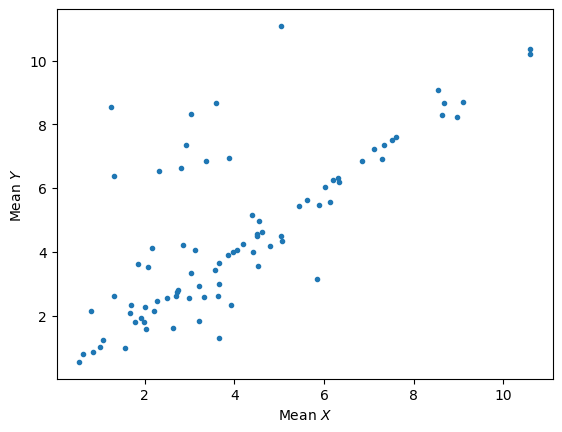

In [23]:
import matplotlib.pyplot as plt

# Set up plot
plt.figure()

# Plot a scatter of the mean x and y data
plt.scatter(df.Mean_X, df.Mean_y, marker=".")

# Label axes
plt.xlabel("Mean $X$")
plt.ylabel("Mean $Y$")

plt.show()

However, `pandas` has a nice "helper function" to make this easier.

<Axes: xlabel='Mean_X', ylabel='Mean_y'>

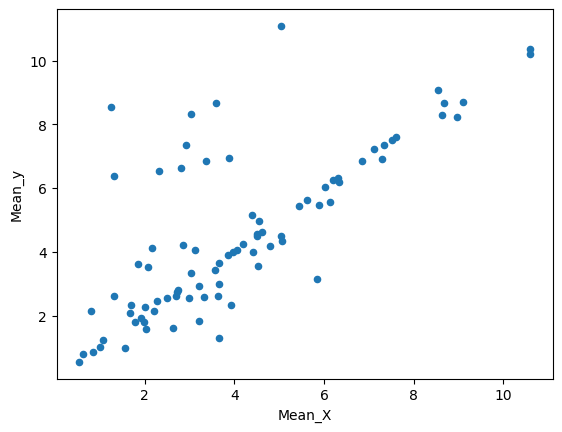

In [21]:
df.plot(x="Mean_X", y="Mean_y", kind="scatter")

Here we have passed the function the name of the columns we want to plot on the x and y axes and told it to plot a `"scatter"` plot via the kind argument. 

But those labels are nasty, lets clean them up.

<Axes: xlabel='Mean $X$', ylabel='Mean $Y$'>

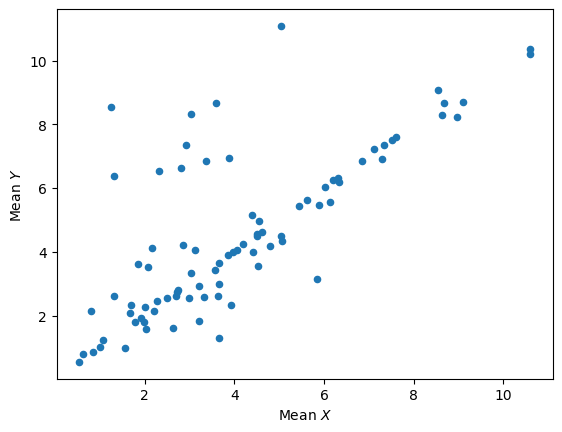

In [24]:
df.plot(x="Mean_X", y="Mean_y", kind="scatter", xlabel="Mean $X$", ylabel="Mean $Y$")

Maybe we want a grid too.

<Axes: xlabel='Mean $X$', ylabel='Mean $Y$'>

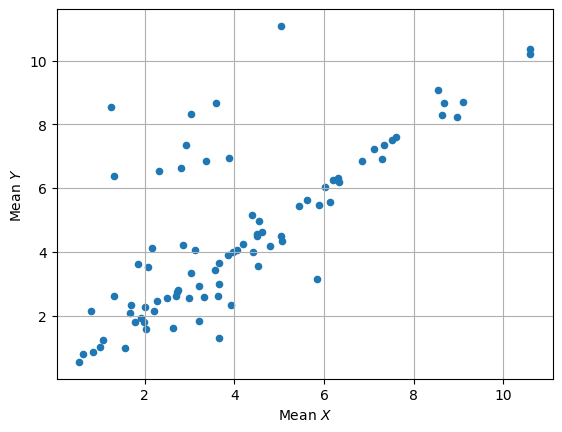

In [25]:
df.plot(x="Mean_X", y="Mean_y", kind="scatter", xlabel="Mean $X$", ylabel="Mean $Y$", grid=True)

And of course, we're missing a title.

<Axes: title={'center': 'My Pandas plot'}, xlabel='Mean $X$', ylabel='Mean $Y$'>

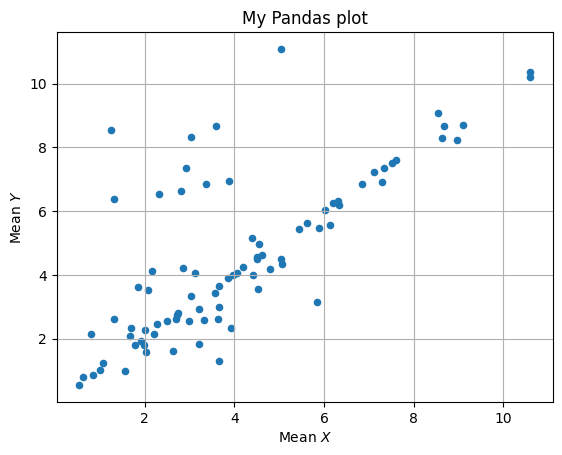

In [26]:
df.plot(x="Mean_X", y="Mean_y", kind="scatter", xlabel="Mean $X$", ylabel="Mean $Y$", grid=True, title="My Pandas plot")

This is a really nice interface to quickly get plots out of a DataFrame but, in my opinion, the moment you try to do anything more complex than a simple plot like this its nicer to use the `matplotlib` interface itself rather than this `pandas` helper function. I feel it gives you more control and the code is more readable. However, if you look at [the docs](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html) for `Dataframe.plot` you'll see there are tons of possible arguments to control a myriad of plot properties. You can really get into the weeds and make complex plots if you wanted!

## Accessing data in the DataFrame 

We've already seen above you can get the data stored in certain columns with `.<column_name>` syntax but there are more ways to access the data. 

If we want to just get the values from a column and store them in a list we can do the following.


In [16]:
mean_x_lst = df.Mean_X.values.tolist()
print(mean_x_lst)

[5.031, 10.599, 10.589, 8.548, 9.089, 8.675, 3.588, 1.244, 3.023, 8.632, 8.953, 7.603, 7.513, 2.917, 7.344, 7.106, 3.889, 7.287, 3.367, 6.839, 2.801, 2.316, 1.328, 6.31, 6.19, 6.329, 6.025, 5.629, 6.123, 5.892, 5.438, 4.398, 4.542, 4.624, 4.501, 4.504, 5.033, 5.068, 4.197, 2.854, 4.784, 2.158, 4.054, 3.124, 3.961, 4.42, 3.853, 3.658, 1.858, 4.537, 2.072, 3.573, 3.041, 5.837, 3.652, 3.209, 2.742, 2.732, 1.312, 3.635, 2.69, 3.32, 2.488, 2.996, 2.269, 1.701, 3.935, 2.015, 0.798, 2.212, 1.672, 1.925, 3.21, 1.979, 1.794, 2.624, 2.027, 3.66, 1.073, 1.007, 1.57, 0.854, 0.619, 0.547]


Here `.values` gets all the values in the column `Mean_X` (you may remember this as the same syntax used in a dictionary), and `tolist()` packages those values as a `list`.

If we want to grab a specific row within the DataFrame, we can use the `loc` attribute, which uses the index. In our case the index is just the row number (starting at 0), but strings are allowed if you set up your DataFrame like that.


In [18]:
# Print the first row of data
print(df.loc[0])
print()  # create a blank line in output

# Print the 51st row of data
print(df.loc[50])
print()  # create a blank line in output

# Print the Mean_X in the 51st row
print(df.loc[50,"Mean_X"])

Name                  XMMXCS J113313.8+662243.9
Redshift                                   0.12
Mean_X                                    5.031
Mean_x_minus_delta                        4.805
Mean_x_plus_delta                         5.255
Mean_y                                   11.087
Mean_y_minus_delta                       10.239
Mean_y_plus_delta                        11.883
Name: 0, dtype: object

Name                  XMMXCS J004252.6+004303.1
Redshift                                   0.27
Mean_X                                    2.072
Mean_x_minus_delta                        1.496
Mean_x_plus_delta                         3.187
Mean_y                                    3.527
Mean_y_minus_delta                        3.002
Mean_y_plus_delta                         4.525
Name: 50, dtype: object

2.072


The `loc` attribute also allows slicing.

In [27]:
print(df.loc[0:2,"Mean_X"])
print(df.loc[0:2,"Mean_X"].values.tolist())

0     5.031
1    10.599
2    10.589
Name: Mean_X, dtype: float64
[5.031, 10.599, 10.589]


Where we have again used `.values.tolist()` to store `"Mean_X"` from the first 3 in a list.

I encourage you to use the `help` function (or [the docs](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html)) to look through `pd.DataFrame` and see all the other attributes and methods which can be used. There's a pleathora! In particular, the `shape` attribute can be used to tell you how many rows, and how many columns are in the DataFrame.


In [28]:
df.shape

(84, 8)


The output, `(84,8)`, tells us that our `DataFrame` (`df`) has 84 rows and 8 columns. Note that this means we actually have 84 rows, not 83 rows and the columns names (header), i.e. the column names **do not** count as a row.

## Adding columns to a DataFrame

One particularly useful thing we can do is compute things from the data and add this new information to the DataFrame. You can apply any operator to any columns, and `pandas` will perform the operation on every value in that column (in reality this is done row by row behind the scenes). You can then store the results back into the DataFrame in the same way as you would store a value in a dictionary with a key.


In [29]:
# Define new columns containing the data produced by an operation
df["Mean_X_upper"] = df.Mean_x_plus_delta - df.Mean_X
df["Mean_X_lower"] = df.Mean_X - df.Mean_x_minus_delta

# Output the first row to see these changes
df.loc[0]

Name                  XMMXCS J113313.8+662243.9
Redshift                                   0.12
Mean_X                                    5.031
Mean_x_minus_delta                        4.805
Mean_x_plus_delta                         5.255
Mean_y                                   11.087
Mean_y_minus_delta                       10.239
Mean_y_plus_delta                        11.883
Mean_X_upper                              0.224
Mean_X_lower                              0.226
Name: 0, dtype: object


## Saving your DataFrame

Now that we have added some new data to the DataFrame we want a way to save the DataFrame including this new data. To do so we can write the DataFrame back to a new CSV. This way, if you screw up, you can load back in the data from the saved state. For this course, you will rarely be working on sufficiently large data to warrant such an approach, but it is useful.

To save a CSV file we can simply call the `to_csv`` method.


In [30]:
df.to_csv("Week6_with_errors.csv")



## Exercises

1. Write code to view and create columns in a DataFrame.
    - Print the 50th, 72nd and 9th rows, including all their columns.
    - In one code line, print the "Mean_y" values for rows 62-71.
    - Add two new columns to your DataFrame similar to the "Mean_X_upper" and "Mean_X_lower" example above but now for "Mean_y".
    - Save the updated DataFrame with the new columns to a csv file.
    - Read the csv you just created back into a new DataFrame, and have a look - what do you now notice? 

